# Clicks to Conversions: Which Platform Performs Better, Facebook or AdWords?  

⚫By  Antonio Rendon

___

## Introduction
The objective of this project is to analyze the relationship between clicks and conversions on two major online advertising platforms, Facebook and AdWords. By utilizing regression analysis, the aim was to determine how effectively clicks predict conversions on each platform and to compare the performance between the two. This analysis helps in understanding which platform might offer better return on investment in terms of conversion per click and provides insights into the data's behavior and statistical properties.

___

### Data preparation

In [83]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm


In [64]:
# Load the excel file

df= pd.read_excel('Capstone Dataset_Original.xlsx')

In [65]:
# Show the first 5 lines in the dataframe
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,2019-01-01,FB_Jan19,2116,18,8,126,0.0083,0.4273,7.14,AW_Jan19,4984,59,5,194,0.0118,0.0840,3.30
1,2019-01-02,FB_Jan19,3106,36,12,104,0.0115,0.3404,2.91,AW_Jan19,4022,71,6,75,0.0177,0.0780,1.05
2,2019-01-03,FB_Jan19,3105,26,8,102,0.0084,0.3145,3.89,AW_Jan19,3863,44,4,141,0.0113,0.0959,3.23
3,2019-01-04,FB_Jan19,1107,27,9,71,0.0245,0.3476,2.62,AW_Jan19,3911,49,5,141,0.0126,0.1108,2.86
4,2019-01-05,FB_Jan19,1317,15,7,78,0.0110,0.4759,5.38,AW_Jan19,4070,55,7,133,0.0136,0.1222,2.40


In [66]:
# Lets create 2 dataframes , one for Facebook and the other for AdWords

facebook = df[['Date', 'Facebook Ad Campaign', 'Facebook Ad Views',
       'Facebook Ad Clicks', 'Facebook Ad Conversions', 'Cost per Facebook Ad',
       'Facebook Click-Through Rate (Clicks / View)',
       'Facebook Conversion Rate (Conversions / Clicks)',
       'Facebook Cost per Click (Ad Cost / Clicks)']].copy()

adwords = df[['Date','AdWords Ad Campaign',
       'AdWords Ad Views', 'AdWords Ad Clicks', 'AdWords Ad Conversions',
       'Cost per AdWords Ad', 'AdWords Click-Through Rate (Clicks / View)',
       'AdWords Conversion Rate (Conversions / Click)',
       'AdWords Cost per Click (Ad Cost / Clicks)']].copy()

# Changing the column names for better handling
facebook.rename(columns={'Facebook Ad Campaign': 'Campaign', 'Facebook Ad Views' : 'Views', 'Facebook Ad Clicks' : 'Clicks',
              'Facebook Ad Conversions' : 'Conversions', 'Cost per Facebook Ad' : 'Cost',
              'Facebook Click-Through Rate (Clicks / View)': 'Clickrate', 'Facebook Conversion Rate (Conversions / Clicks)' : 'Conversionrate',
              'Facebook Cost per Click (Ad Cost / Clicks)':'CostperClick'}, inplace=True)
adwords.rename(columns={'AdWords Ad Campaign': 'Campaign', 'AdWords Ad Views' : 'Views', 'AdWords Ad Clicks' : 'Clicks',
              'AdWords Ad Conversions' : 'Conversions', 'Cost per AdWords Ad' : 'Cost',
              'AdWords Click-Through Rate (Clicks / View)': 'Clickrate', 'AdWords Conversion Rate (Conversions / Click)': 'Conversionrate',
              'AdWords Cost per Click (Ad Cost / Clicks)':'CostperClick'}, inplace=True)


In [67]:
# Check the results
print("Columns in facebook: ", facebook.columns)
print("Columns in adwords", adwords.columns)

Columns in facebook:  Index(['Date', 'Campaign', 'Views', 'Clicks', 'Conversions', 'Cost',
       'Clickrate', 'Conversionrate', 'CostperClick'],
      dtype='object')
Columns in adwords Index(['Date', 'Campaign', 'Views', 'Clicks', 'Conversions', 'Cost',
       'Clickrate', 'Conversionrate', 'CostperClick'],
      dtype='object')


## Descriptive Analysis
Mean, Median, and Mode help you compare data. Below, list the mean, median, and mode of the clicks in the provided data.

In [68]:
# Get the statistics for each dataframe
descriptionfb = facebook[['Clicks','Conversions']].describe()
descriptionaw = adwords[['Clicks','Conversions']].describe()

# Print the results
print("Statistics for 'Clicks' in the Facebook DataFrame:")
print(descriptionfb)

print("Statistics for 'Clicks' in the Adwords DataFrame:")
print(descriptionaw)


Statistics for 'Clicks' in the Facebook DataFrame:
           Clicks  Conversions
count  365.000000   365.000000
mean    44.049315    11.742466
std     12.140559     2.924786
min     15.000000     5.000000
25%     35.000000    10.000000
50%     43.000000    12.000000
75%     54.000000    13.000000
max     73.000000    19.000000
Statistics for 'Clicks' in the Adwords DataFrame:
           Clicks  Conversions
count  365.000000   365.000000
mean    60.383562     5.980822
std     14.368225     1.628106
min     31.000000     3.000000
25%     49.000000     5.000000
50%     60.000000     6.000000
75%     73.000000     7.000000
max     89.000000     9.000000


### Insights
__Average Clicks__: AdWords has a higher average of clicks (60.38) compared to Facebook (44.05). This indicates that, on average, AdWords generated more clicks on its ads than Facebook.

__Average Conversions__: Facebook has a higher average of conversions (11.74) compared to AdWords (5.98). This suggests that although AdWords received more clicks, Facebook was more effective at converting those clicks into desired actions (such as sales, sign-ups, etc.).

__Standard Deviation of Clicks__: The standard deviation for AdWords clicks is 14.37, compared to 12.14 for Facebook. This implies that clicks on AdWords are more variable or dispersed than those on Facebook.

__Standard Deviation of Conversions__: The standard deviation is also higher on Facebook for conversions (2.92) compared to AdWords (1.63), indicating greater variability in conversions on Facebook.

__Practical Implications__
Although AdWords appears to be more effective at attracting clicks, Facebook is more effective in terms of achieving conversions. This could suggest that Facebook ads are better targeted or more appealing for concrete actions beyond just clicking.

___

## Histograms

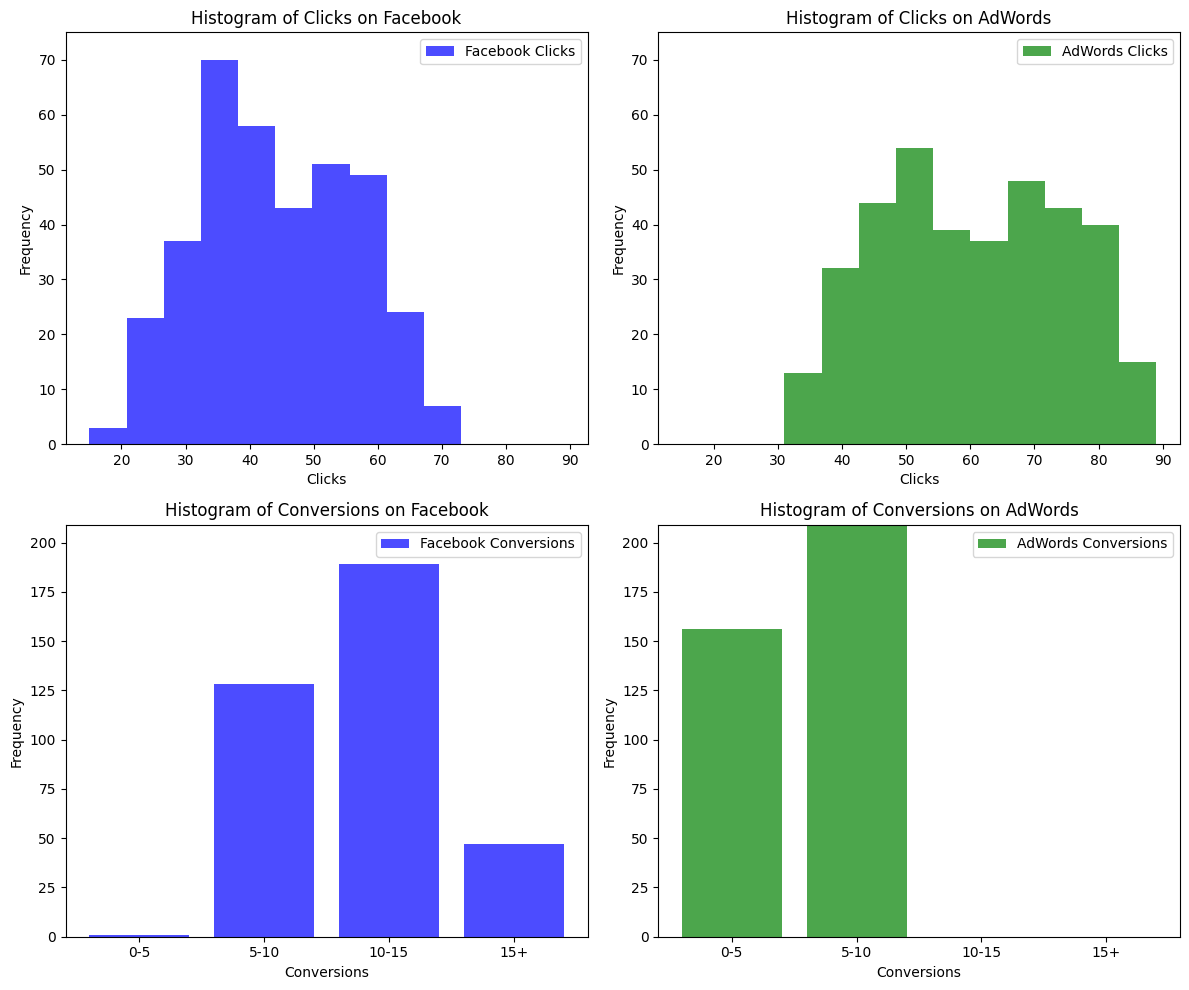

In [76]:
# Setting up the histograms size
plt.figure(figsize=(12, 10))

# Histogram for Facebook Clicks
ax1 = plt.subplot(2, 2, 1)
counts, bins, patches = ax1.hist(facebook['Clicks'], bins=10, color='blue', alpha=0.7, label='Facebook Clicks')
ax1.set_title('Histogram of Clicks on Facebook')
ax1.set_xlabel('Clicks')
ax1.set_ylabel('Frequency')
ax1.legend()

# Find the maximum frequency to set the same Y limit for both Clicks histograms
max_freq = max(counts) +5  # +5 for a better visualization

# Histogram for AdWords Clicks
ax2 = plt.subplot(2, 2, 2, sharex=ax1, sharey=ax1)
counts2, bins2, patches2 = ax2.hist(adwords['Clicks'], bins=10, color='green', alpha=0.7, label='AdWords Clicks')
ax2.set_title('Histogram of Clicks on AdWords')
ax2.set_xlabel('Clicks')
ax2.set_ylabel('Frequency')
ax2.legend()

# Set the same Y axis limits for both Clicks histograms based on the highest frequency found
ax1.set_ylim(0, max(max_freq, max(counts2)))

# Define bins and labels for conversions
bins = [0, 5, 10, 15, np.inf]
labels = ['0-5', '5-10', '10-15', '15+']

# Categorize conversions using defined bins
facebook['Categorized Conversions'] = pd.cut(facebook['Conversions'], bins=bins, labels=labels, right=True)
adwords['Categorized Conversions'] = pd.cut(adwords['Conversions'], bins=bins, labels=labels, right=True)

# Correctly order categorical data
order = ['0-5', '5-10', '10-15', '15+']

# Histogram for Facebook Conversions
ax3 = plt.subplot(2, 2, 3)
values = facebook['Categorized Conversions'].value_counts().reindex(order)
ax3.bar(values.index, values.values, color='blue', alpha=0.7, label='Facebook Conversions')
ax3.set_title('Histogram of Conversions on Facebook')
ax3.set_xlabel('Conversions')
ax3.set_ylabel('Frequency')
ax3.legend()

# Histogram for AdWords Conversions
ax4 = plt.subplot(2, 2, 4, sharey=ax3)
values2 = adwords['Categorized Conversions'].value_counts().reindex(order)
ax4.bar(values2.index, values2.values, color='green', alpha=0.7, label='AdWords Conversions')
ax4.set_title('Histogram of Conversions on AdWords')
ax4.set_xlabel('Conversions')
ax4.set_ylabel('Frequency')
ax4.legend()

# Ensure y-axis are the same for the conversion charts
max_conv_freq = max(values.max(), values2.max())
ax3.set_ylim(0, max_conv_freq)
ax4.set_ylim(0, max_conv_freq)

# Adjust layout and display the graph
plt.tight_layout()
plt.show()


The histograms suggest that Facebook generally achieves higher conversion rates, particularly in the 10-15 range, while AdWords tends to have more frequent, but lower, conversion counts. Click patterns are similar across both platforms, indicating comparable user engagement in terms of ad clicks.

___
 ### Correlations


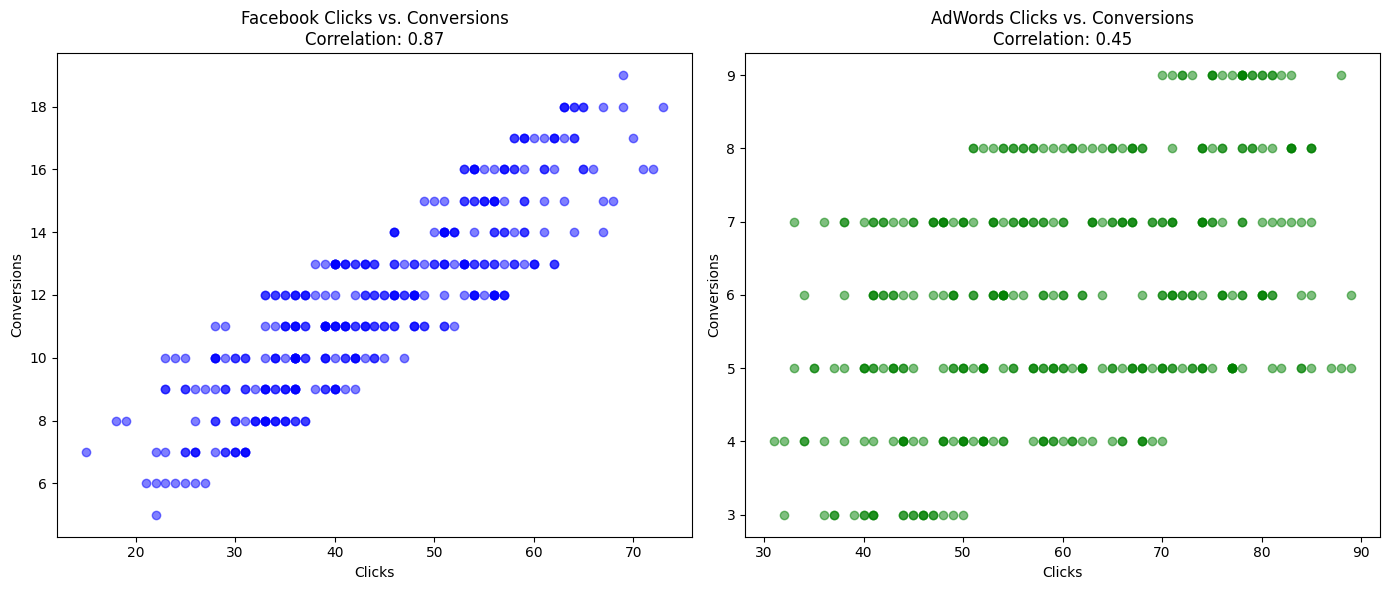

Facebook Clicks and Conversions Correlation Coefficient: 0.8737750148613909
AdWords Clicks and Conversions Correlation Coefficient: 0.44799320094697687


In [77]:
# Calculate the Pearson correlation coefficients
facebook_corr_coef = facebook['Clicks'].corr(facebook['Conversions'])
adwords_corr_coef = adwords['Clicks'].corr(adwords['Conversions'])

# Create scatter plots
plt.figure(figsize=(14, 6))

# Scatter plot for Facebook
plt.subplot(1, 2, 1)
plt.scatter(facebook['Clicks'], facebook['Conversions'], alpha=0.5, color='blue')
plt.title(f'Facebook Clicks vs. Conversions\nCorrelation: {facebook_corr_coef:.2f}')
plt.xlabel('Clicks')
plt.ylabel('Conversions')

# Scatter plot for AdWords
plt.subplot(1, 2, 2)
plt.scatter(adwords['Clicks'], adwords['Conversions'], alpha=0.5, color='green')
plt.title(f'AdWords Clicks vs. Conversions\nCorrelation: {adwords_corr_coef:.2f}')
plt.xlabel('Clicks')
plt.ylabel('Conversions')

# Show the plots
plt.tight_layout()
plt.show()

# Print the correlation coefficients
print('Facebook Clicks and Conversions Correlation Coefficient:', facebook_corr_coef)
print('AdWords Clicks and Conversions Correlation Coefficient:', adwords_corr_coef)


Facebook shows a stronger correlation between clicks and conversions, suggesting that clicks are a good predictor of conversions on Facebook. On AdWords, there is a positive correlation, but it is not as strong, which means that clicks are less predictive of conversions compared to Facebook.
___

## Hypotesis testing

__Null Hypothesis (H0)__: The average conversion rate for clicks on Facebook is equal to the average conversion rate for clicks on AdWords.

__Alternative Hypothesis (H1)__: The average conversion rate for clicks on Facebook is greater than the average conversion rate for clicks on AdWords.

In [81]:
# T-test
t_statistic, p_value = stats.ttest_ind(facebook['Conversions'], adwords['Conversions'], equal_var=True, alternative='greater')

# Define our significance level (commonly 0.05 for a 5% significance level)
alpha = 0.05

# Output the results
print(f'The T-statistic is: {t_statistic}')
print(f'The p-value is: {p_value}')

# Compare the p-value against the significance level
if p_value < alpha:
    print(f'Since the p-value ({p_value}) is less than the significance level ({alpha}), we reject the null hypothesis.')
    print(f'This suggests that there is statistically significant evidence to support the alternative hypothesis.')
else:
    print(f'Since the p-value ({p_value}) is greater than the significance level ({alpha}), we do not reject the null hypothesis.')
    print(f'This suggests that there is not enough statistical evidence to support the alternative hypothesis.')


The T-statistic is: 32.88402060758184
The p-value is: 2.2798404142996724e-146
Since the p-value (2.2798404142996724e-146) is less than the significance level (0.05), we reject the null hypothesis.
This suggests that there is statistically significant evidence to support the alternative hypothesis.


## MODEL

Linear regression is a suitable choice for modeling the relationship between clicks and conversions for several reasons:

1. __Simplicity and Interpretability__: Linear regression is straightforward and provides results that are easy to interpret. It allows you to directly see the relationship between the dependent and independent variables.

2. __Linear Relationship__: Based on the scatter plots and correlation coefficients, there seems to be a linear relationship between clicks and conversions, meaning that as clicks increase, conversions tend to increase as well. Linear regression is ideal for modeling this direct relationship.

3. __Prediction__: It enables making predictions about conversions based on a given number of clicks, which can be useful for planning and decision-making.




In our regression model:

* The __independent variable__ (or predictor) would be Clicks, as it is the variable presumed to influence the other variable.
* The __dependent variable__ (or response) would be Conversions, as it is the variable we are trying to predict or explain.

In [84]:
# 'Clicks' is our independent variable and 'Conversions' our dependent variable.

# Define the independent variable (adding a constant to the model)
X = facebook['Clicks']
X = sm.add_constant(X)  # This adds the constant column needed for the intercept term

# Define the dependent variable
y = facebook['Conversions']

# Create the linear regression model
model = sm.OLS(y, X).fit()  # OLS stands for 'Ordinary Least Squares'

# Display the model summary
model_summary = model.summary()
print(model_summary)

# To make a prediction, for example, for 50 clicks:
prediction = model.predict([1, 50])  # Here, '1' represents the constant
print(f'The predicted conversions for 50 clicks is: {prediction[0]}')


                            OLS Regression Results                            
Dep. Variable:            Conversions   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     1172.
Date:                Sat, 13 Apr 2024   Prob (F-statistic):          1.09e-115
Time:                        20:10:43   Log-Likelihood:                -646.02
No. Observations:                 365   AIC:                             1296.
Df Residuals:                     363   BIC:                             1304.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4700      0.281      8.792      0.0

## Results

The model shows a strong linear relationship between clicks and conversions with very high statistical significance. However, the normality tests for residuals suggest that the distribution of these does not follow a normal, which might be a concern for classical statistical inference that assumes normality. This may require further investigation, such as data transformations or using robust or non-parametric models.

##  Conclusion

The project findings suggest that Facebook may provide a better return on investment for conversion-driven campaigns compared to AdWords, based on the data analyzed. Future analyses might include more complex models or non-parametric methods to address the issues of normality and provide a more comprehensive understanding of the factors influencing conversions on these platforms.
